In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [67]:
df = pd.read_csv(r"C:\Users\parth\Documents\COLLEGE WORKS\DAI-101\Practice Problems\laptop_prices.csv")

Let's First Analyse and see DataFrame and take a overview of it. 

In [68]:
df.head()

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1339.69,Standard,2560,...,Yes,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,898.94,Standard,1440,...,No,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575.00,Full HD,1920,...,No,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,2537.45,Standard,2880,...,Yes,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,1803.60,Standard,2560,...,Yes,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650


In [69]:
df.shape

(1275, 23)

In [70]:
df.columns

Index(['Company', 'Product', 'TypeName', 'Inches', 'Ram', 'OS', 'Weight',
       'Price_euros', 'Screen', 'ScreenW', 'ScreenH', 'Touchscreen',
       'IPSpanel', 'RetinaDisplay', 'CPU_company', 'CPU_freq', 'CPU_model',
       'PrimaryStorage', 'SecondaryStorage', 'PrimaryStorageType',
       'SecondaryStorageType', 'GPU_company', 'GPU_model'],
      dtype='object')

In [71]:
df.describe()

,Inches,Ram,Weight,Price_euros,ScreenW,ScreenH,CPU_freq,PrimaryStorage,SecondaryStorage
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,8.440784,2.040525,1134.969059,1900.043922,1073.904314,2.302980,444.517647,176.069020
std,1.429470,5.097809,0.669196,700.752504,493.346186,283.883940,0.503846,365.537726,415.960655
min,10.100000,2.000000,0.690000,174.000000,1366.000000,768.000000,0.900000,8.000000,0.000000
25%,14.000000,4.000000,1.500000,609.000000,1920.000000,1080.000000,2.000000,256.000000,0.000000
50%,15.600000,8.000000,2.040000,989.000000,1920.000000,1080.000000,2.500000,256.000000,0.000000
75%,15.600000,8.000000,2.310000,1496.500000,1920.000000,1080.000000,2.700000,512.000000,0.000000
max,18.400000,64.000000,4.700000,6099.000000,3840.000000,2160.000000,3.600000,2048.000000,2048.000000


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

Finding the number of Null elements in the Dataset.

In [73]:
df.isnull().sum()

Company                 0
Product                 0
TypeName                0
Inches                  0
Ram                     0
OS                      0
Weight                  0
Price_euros             0
Screen                  0
ScreenW                 0
ScreenH                 0
Touchscreen             0
IPSpanel                0
RetinaDisplay           0
CPU_company             0
CPU_freq                0
CPU_model               0
PrimaryStorage          0
SecondaryStorage        0
PrimaryStorageType      0
SecondaryStorageType    0
GPU_company             0
GPU_model               0
dtype: int64

Finding the number of Duplicate elements in the Dataset.

In [74]:
df.duplicated().sum()

np.int64(0)

UNIVARIATE ANALYSIS

In [118]:
df.OS.value_counts()

OS
Windows 10      1048
No OS             66
Linux             58
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

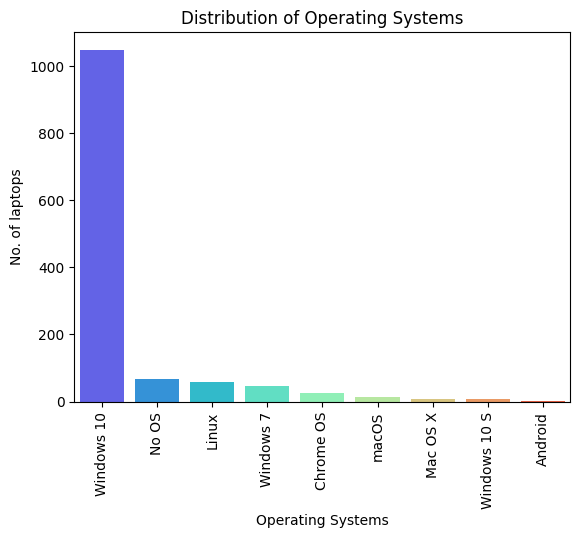

In [135]:

sns.barplot(x=df['OS'].value_counts().index,y=df['OS'].value_counts(), palette='rainbow', hue=df['OS'].value_counts().index)
plt.title("Distribution of Operating Systems")
plt.xlabel("Operating Systems")
plt.ylabel("No. of laptops")
plt.xticks(rotation = 90)
plt.show()

MacOs are the most used operating systems

In [76]:
x = df[df['OS']=='No OS']
x['Company'].value_counts()

Company
Lenovo    47
HP        12
Asus       4
Xiaomi     3
Name: count, dtype: int64

In [77]:
df['Company'].unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [78]:
df['Company'].value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         152
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64

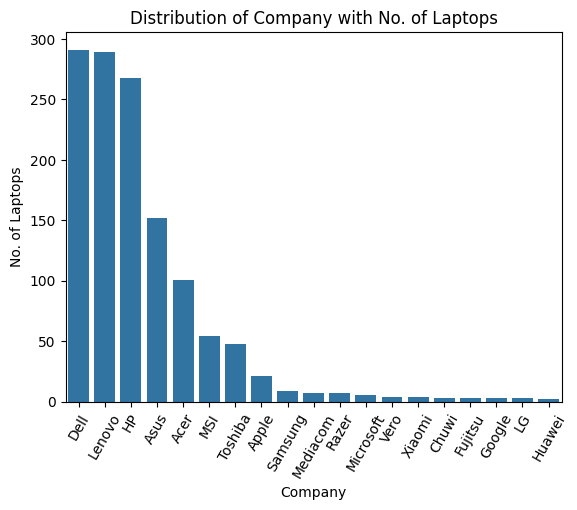

In [116]:
sns.barplot(x=df['Company'].value_counts().index,y=df['Company'].value_counts())
plt.title("Distribution of Company with No. of Laptops")
plt.ylabel("No. of Laptops")
plt.xticks(rotation=60)
plt.show()

Dell, Lenovo and HP are leading manufacturers of laptops

In [107]:
df.TypeName.value_counts()

TypeName
Notebook              707
Gaming                205
Ultrabook             194
2 in 1 Convertible    117
Workstation            29
Netbook                23
Name: count, dtype: int64

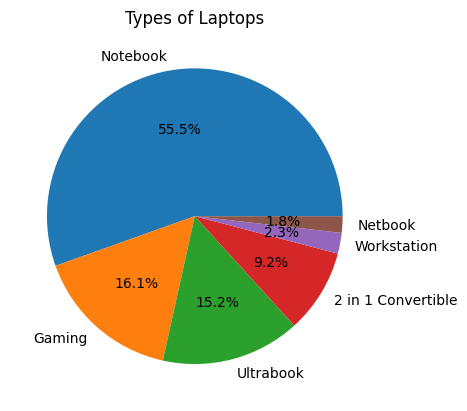

In [125]:
plt.pie(df['TypeName'].value_counts(), labels=df['TypeName'].value_counts().index,autopct="%1.1f%%")
plt.title("Types of Laptops")
plt.show()

Notebook is the most sold laptop type.

Ram
8     613
4     367
16    198
6      35
12     25
32     17
2      16
24      3
64      1
Name: count, dtype: int64


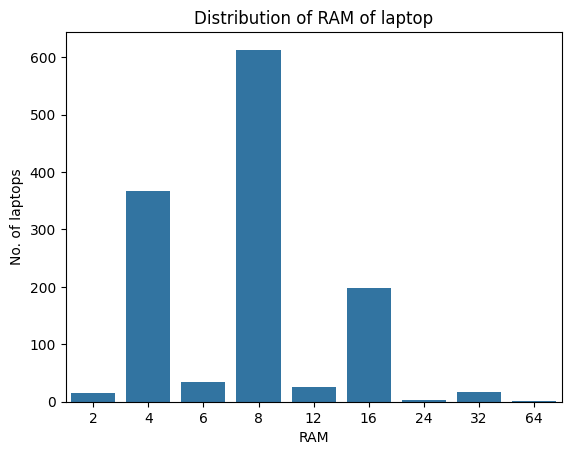

In [119]:
print(df['Ram'].value_counts())

sns.barplot(x=df['Ram'].value_counts().index,y=df['Ram'].value_counts())
plt.title("Distribution of RAM of laptop")
plt.xlabel("RAM")
plt.ylabel("No. of laptops")
plt.show()

As seen above 8 GB RAM are most sold laptops

In [82]:
print(df['Price_euros'].describe())

count    1275.000000
mean     1134.969059
std       700.752504
min       174.000000
25%       609.000000
50%       989.000000
75%      1496.500000
max      6099.000000
Name: Price_euros, dtype: float64


Most and Least Expensive Laptops

In [83]:
df[(df['Price_euros']==df['Price_euros'].min()) | (df['Price_euros']==df['Price_euros'].max())]

,Company,Product,TypeName,Inches,Ram,OS,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
196,Razer,Blade Pro,Gaming,17.3,32,Windows 10,3.49,6099.0,4K Ultra HD,3840,...,No,Intel,2.9,Core i7 7820HK,1024,0,SSD,No,Nvidia,GeForce GTX 1080
1215,Acer,C740-C9QX (3205U/2GB/32GB/Chrome,Netbook,11.6,2,Chrome OS,1.30,174.0,Standard,1366,...,No,Intel,1.5,Celeron Dual Core 3205U,32,0,SSD,No,Intel,HD Graphics


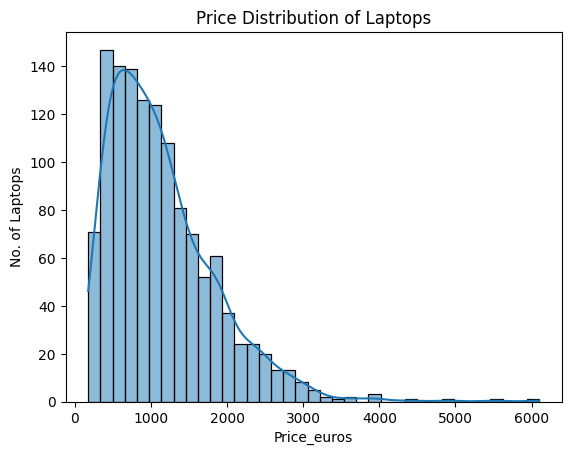

In [84]:
sns.histplot(x=df['Price_euros'], kde=True)
plt.ylabel("No. of Laptops")
plt.title("Price Distribution of Laptops")
plt.show()

As seen above laptop around the range of 300-1100 euros are most sold.

Let's see the laptops with Extraordinary Prices as Potential Outliers

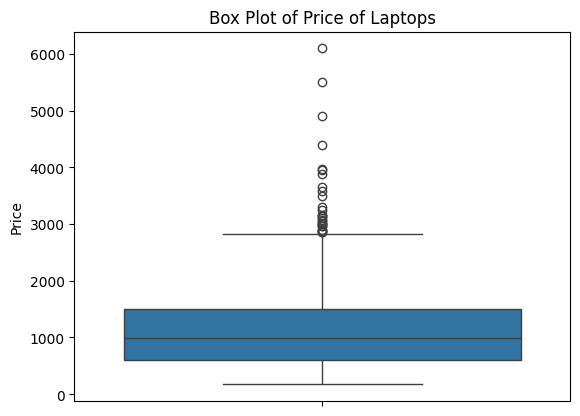

In [123]:
sns.boxplot(df.Price_euros)
plt.title("Box Plot of Price of Laptops")
plt.ylabel("Price")
plt.show()

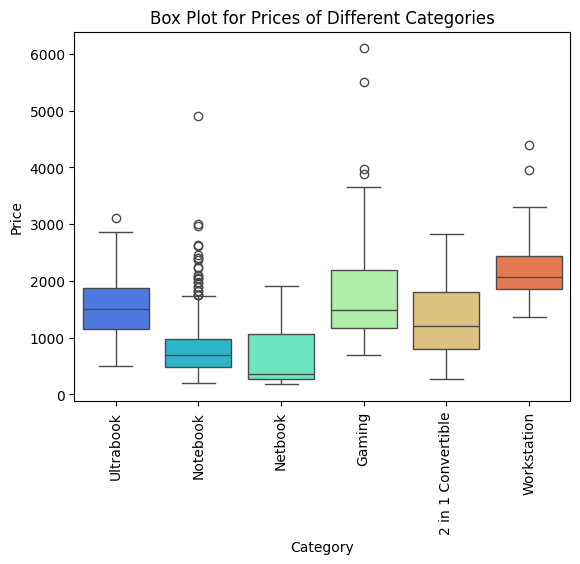

In [86]:
sns.boxplot(x=df['TypeName'],y=df['Price_euros'], palette='rainbow', hue=df['TypeName'])
plt.title("Box Plot for Prices of Different Categories")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

From above, we can see Notebooks have more outlier prices

In [87]:
Q1 = df['Price_euros'].quantile(0.25)
Q2 = df['Price_euros'].quantile(0.50)
Q3 = df['Price_euros'].quantile(0.75)
IQR = Q3-Q1

upper_bound = Q3 + 1.5*IQR
lower_bound = Q1 - 1.5*IQR

outliers = df[(df['Price_euros'] > upper_bound) | (df['Price_euros'] < lower_bound)]
print("Upper Bound is : ",upper_bound,"\nLower Bound is :",lower_bound,"\n\n")
print("The Outliers Are : \n\n",outliers['Price_euros'])
print("\n\nNumber of Outliers are : ", outliers.shape[0])

Upper Bound is :  2827.75 
Lower Bound is : -722.25 


The Outliers Are : 

 17      2858.00
196     6099.00
204     3055.00
238     3890.00
247     2999.00
297     2884.86
517     2968.00
530     3012.77
563     2999.00
610     4899.00
659     3147.37
723     3659.40
744     3299.00
749     4389.00
758     2868.99
778     2899.00
780     3588.80
830     5499.00
841     3072.89
911     3100.00
955     3154.00
968     3149.00
1017    2968.00
1066    3975.00
1081    3240.00
1103    2899.00
1136    3949.40
1231    3499.00
Name: Price_euros, dtype: float64


Number of Outliers are :  28


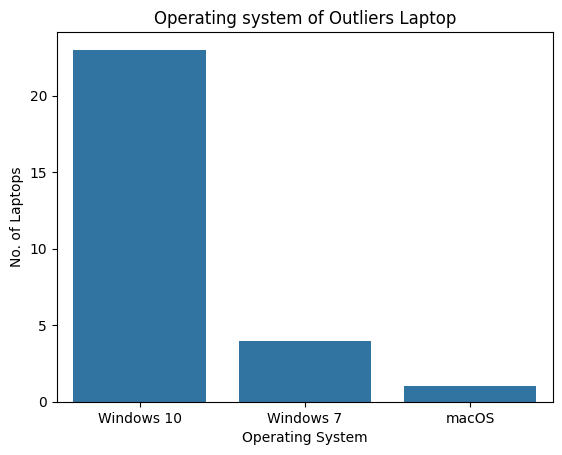

In [120]:
sns.barplot(x=outliers['OS'].value_counts().index,y=outliers['OS'].value_counts())
plt.xlabel('Operating System')
plt.ylabel('No. of Laptops')
plt.title('Operating system of Outliers Laptop')
plt.show()

Mac OS laptops have least outlying priced laptops 

BIVARIATE ANALYSIS

The correlation coefficient between Screen Width and Height is :  0.9940690344373361


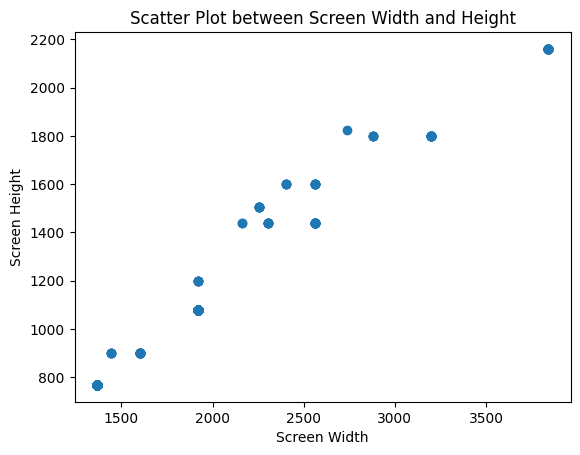

In [89]:
print("The correlation coefficient between Screen Width and Height is : ",df['ScreenW'].corr(df['ScreenH']))

plt.scatter(df['ScreenW'],df['ScreenH'])
plt.title('Scatter Plot between Screen Width and Height')
plt.xlabel('Screen Width')
plt.ylabel('Screen Height')
plt.show()

The correlation coefficient between Inches and Weight is :  0.8266379625499077


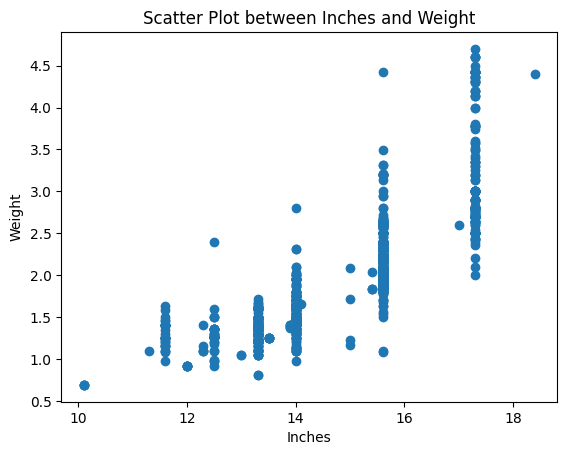

In [126]:
print("The correlation coefficient between Inches and Weight is : ",df['Inches'].corr(df['Weight']))

plt.scatter(df['Inches'],df['Weight'])
plt.title('Scatter Plot between Inches and Weight')
plt.xlabel('Inches')
plt.ylabel('Weight')
plt.show()

In [91]:
table = pd.crosstab(df['TypeName'],df['CPU_company'])
table

CPU_company,AMD,Intel,Samsung
TypeName,,,
2 in 1 Convertible,0,116,1
Gaming,6,199,0
Netbook,0,23,0
Notebook,53,654,0
Ultrabook,1,193,0
Workstation,0,29,0


Text(50.72222222222221, 0.5, 'Typename')

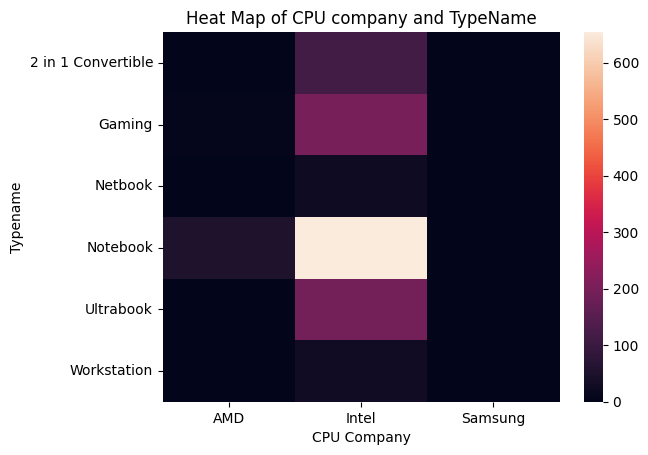

In [129]:
sns.heatmap(table)
plt.title("Heat Map of CPU company and TypeName")
plt.xlabel("CPU Company")
plt.ylabel("Typename")

chi2 Test

In [130]:
chi2, p, dof, expected = chi2_contingency(table)
print("The value of chi2 is :",chi2)
print("The value of p is :", p)

if p < 0.05:
    print("The Distribution of Weight and TypeName is Statistically Significant")
else :
    print("The Distribution of Weight and TypeName is not Statistically Significant")

The value of chi2 is : 39.47411795836697
The value of p is : 2.0965450168795277e-05
The Distribution of Weight and TypeName is Statistically Significant


TypeName
2 in 1 Convertible    1289.714530
Gaming                1731.380634
Netbook                673.382609
Notebook               788.744781
Ultrabook             1556.676031
Workstation           2280.358966
Name: Price_euros, dtype: float64


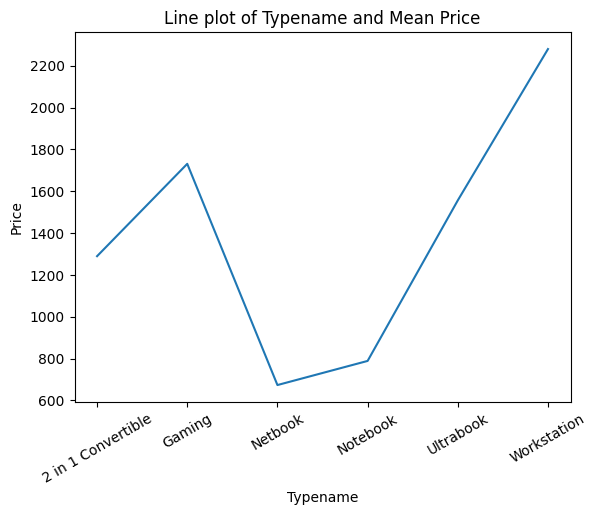

In [94]:
group = df.groupby('TypeName')['Price_euros'].mean()
print(group)

sns.lineplot(group)
plt.title('Line plot of Typename and Mean Price')
plt.xlabel('Typename')
plt.ylabel('Price')
plt.xticks(rotation=30)
plt.show()

Generally, Netbook are least and Workstation are most expensive.

TypeName
2 in 1 Convertible    1.546504
Gaming                2.949761
Netbook               1.317826
Notebook              2.055615
Ultrabook             1.344680
Workstation           2.466552
Name: Weight, dtype: float64


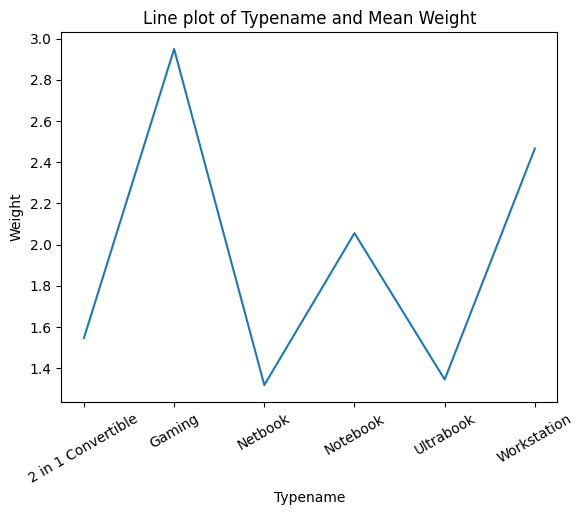

In [95]:
group = df.groupby('TypeName')['Weight'].mean()
print(group)

sns.lineplot(group)
plt.title('Line plot of Typename and Mean Weight')
plt.xlabel('Typename')
plt.ylabel('Weight')
plt.xticks(rotation=30)
plt.show()

Generally, Gaming Laptops are more heavy while Netbooks and Ultrabooks are light

In [132]:
#TypeName and Weight ANOVA


group_A = df[df['Company'] == 'Dell']['Price_euros']
group_B = df[df['Company'] == 'Lenovo']['Price_euros']
group_C = df[df['Company'] == 'HP']['Price_euros']
group_D = df[df['Company'] == 'Asus']['Price_euros']
# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group_A, group_B, group_C,group_D)

print("F-statistic:", f_stat)
print("p-value:", p_value)

if p_value < 0.05:
    print("The Distribution of Weight and TypeName is Statistically Significant")
else :
    print("The Distribution of Weight and TypeName is not Statistically Significant")

F-statistic: 1.7801872982157807
p-value: 0.1492338142260135
The Distribution of Weight and TypeName is not Statistically Significant


I have written all the conclusions in between the analysis as and when they are drawn